<a href="https://colab.research.google.com/github/JuanoMaggi/Entrega-Coder/blob/main/Proyecto_ParteIII_Maggi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pre-Entrega Numero 1 - Data Science I : Fundamentos para la Ciencia de Datos**

Abstract:

El dataset elegido contiene información de encuestas realizadas a personas sobre su situación laboral en el sector de informatica. Esta compuesto por 50 atributos y 5767 registros, las encuestas recopilan datos sobre diversos aspectos del trabajo, incluyendo las siguientes variables:

estoy_trabajando_en
donde_estas_trabajando
dedicacion
tipo_de_contrato
ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local
ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local
pagos_en_dolares
si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron
pagos_en_criptomonedas
que_porcentaje_o_monto_recibis_en_criptomonedas
recibis_algun_tipo_de_bono
a_que_esta_atado_el_bono
tuviste_actualizaciones_de_tus_ingresos_laborales_durante_2022
de_que_fue_el_ajuste_total_acumulado
en_que_mes_fue_el_ultimo_ajuste
como_consideras_que_estan_tus_ingresos_laborales_comparados_con_el_semestre_anterior
con_que_beneficios_contas
que_tan_conforme_estas_con_tus_ingresos_laborales
estas_buscando_trabajo
trabajo_de
anos_de_experiencia
antiguedad_en_la_empresa_actual
tiempo_en_el_puesto_actual
cuantas_personas_a_cargo_tenes
plataformas_que_utilizas_en_tu_puesto_actual
lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual
frameworks
herramientas_y_librerias_que_utilices_en_tu_puesto_actual
bases_de_datos
qa_testing
cantidad_de_personas_en_tu_organizacion
modalidad_de_trabajo
si_trabajas_bajo_un_esquema_hibrido_cuantos_dias_a_la_semana_vas_a_la_oficina
la_recomendas_como_un_buen_lugar_para_trabajar
salir_o_seguir_contestando
maximo_nivel_de_estudios
estado
carrera
universidad
participaste_de_algun_boot_camp
si_participaste_de_un_boot_camp
que_carrera_estudiaste
salir_o_seguir_contestando_sobre_las_guardias
tenes_guardias
cuanto_cobras_por_guardia
porcentajebruto_o_neto
salir_o_seguir_contestando_sobre_estudios
tengo_edad
me_identifico_genero
sueldo_dolarizado
seniority



In [ ]:
#Importamos las librerias que vamos a utilizar para trabajar el dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler


In [ ]:
#importamos el dataset

# df = pd.read_csv("/content/drive/MyDrive/colab/2023.1_Sysarmy_Encuesta de remuneracin salarial Argentina.csv")


url='https://drive.google.com/file/d/12-PEX-SmxDXkBlAjBO_mIFWCr5mFipJZ/view?usp=sharing'
df = pd.read_csv('https://drive.google.com/uc?id=' + url.split('/')[-2])

In [ ]:
# Verificar los valores nulos
df = df.dropna()

In [ ]:
# Con el metodo head vemos que se haya importado correctamente y visualizamos las primeras 5 filas del dataset.

df.head()

,estoy_trabajando_en,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local,ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local,pagos_en_dolares,si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,pagos_en_criptomonedas,que_porcentaje_o_monto_recibis_en_criptomonedas,...,salir_o_seguir_contestando_sobre_las_guardias,tenes_guardias,cuanto_cobras_por_guardia,porcentajebruto_o_neto,salir_o_seguir_contestando_sobre_estudios,tengo_edad,me_identifico_genero,sueldo_dolarizado,seniority,me_id_extra
0,Argentina,Buenos Aires,Full-Time,Staff (planta permanente),475480,396346,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25,Varón Cis,False,Semi-Senior,Hombre Cis
1,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),260000,220000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27,Mujer Cis,False,Junior,Mujer Cis
2,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),106350,88560,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21,Varón Cis,False,Junior,Hombre Cis
3,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),339000,283700,NaN,NaN,NaN,NaN,...,Terminar encuesta,No,0.0,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,25,Varón Cis,False,Semi-Senior,Hombre Cis
4,Argentina,Río Negro,Full-Time,Staff (planta permanente),380000,320000,Mi sueldo está dolarizado (pero cobro en moned...,179,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24,Varón Cis,True,Junior,Hombre Cis


In [ ]:
# Con el metodo info vemos que tipo de datos tenemos, numero de filas y columnas, los valores nulos en cada columna, cantidad de memoria.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5767 entries, 0 to 5766
Data columns (total 50 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   estoy_trabajando_en                                                                   5767 non-null   object 
 1   donde_estas_trabajando                                                                5767 non-null   object 
 2   dedicacion                                                                            5767 non-null   object 
 3   tipo_de_contrato                                                                      5767 non-null   object 
 4   ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local                              5767 non-null   int64  
 5   ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local                            

In [ ]:
# Con el metodo describe hacemos un resumen estadistico del dataset

df.describe()

,ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local,de_que_fue_el_ajuste_total_acumulado,como_consideras_que_estan_tus_ingresos_laborales_comparados_con_el_semestre_anterior,que_tan_conforme_estas_con_tus_ingresos_laborales,anos_de_experiencia,antigüedad_en_la_empresa_actual,tiempo_en_el_puesto_actual,cuantas_personas_a_cargo_tenes,si_trabajas_bajo_un_esquema_hibrido_cuantos_dias_a_la_semana_vas_a_la_oficina,la_recomendas_como_un_buen_lugar_para_trabajar,cuanto_cobras_por_guardia
count,5.767000e+03,4857.000000,5767.000000,5767.000000,5767.000000,5767.000000,5767.000000,5767.000000,5767.000000,5767.000000,1.739000e+03
mean,4.372717e+05,130.004789,2.673660,2.615571,7.122733,2.967938,2.466829,2.001734,0.657361,6.733310,3.165044e+04
std,3.044232e+05,3162.530844,0.830379,0.852525,7.076138,4.471850,26.691824,8.072448,1.146179,2.818779,1.499045e+05
min,6.800000e+04,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.300000e+05,18.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000e+00
50%,3.500000e+05,55.000000,3.000000,3.000000,5.000000,1.500000,1.000000,0.000000,0.000000,7.000000,0.000000e+00
75%,5.419000e+05,84.000000,3.000000,3.000000,10.000000,3.000000,3.000000,1.000000,1.000000,9.000000,0.000000e+00
max,1.736000e+06,200000.000000,4.000000,4.000000,48.000000,75.000000,2016.000000,200.000000,5.000000,10.000000,2.500000e+06


In [ ]:
#reemplazamos los guines bajos en las columnas del dataset por espacios en blanco.

columnas_actuales = df.columns.tolist()
columnas_nuevas = [re.sub('_', ' ', columna) for columna in columnas_actuales]
df.rename(columns=dict(zip(columnas_actuales, columnas_nuevas)), inplace=True)

# Verificar los nuevos nombres de columna

print(df.columns)

Index(['estoy trabajando en', 'donde estas trabajando', 'dedicacion',
       'tipo de contrato',
       'ultimo salario mensual o retiro bruto en tu moneda local',
       'ultimo salario mensual o retiro neto en tu moneda local',
       'pagos en dolares',
       'si tu sueldo esta dolarizado cual fue el ultimo valor del dolar que tomaron',
       'pagos en criptomonedas',
       'que porcentaje o monto recibis en criptomonedas',
       'recibis algun tipo de bono', 'a que esta atado el bono',
       'tuviste actualizaciones de tus ingresos laborales durante 2022',
       'de que fue el ajuste total acumulado',
       'en que mes fue el ultimo ajuste',
       'como consideras que estan tus ingresos laborales comparados con el semestre anterior',
       'con que beneficios contas',
       'que tan conforme estas con tus ingresos laborales',
       'estas buscando trabajo', 'trabajo de', 'anos de experiencia',
       'antigüedad en la empresa actual', 'tiempo en el puesto actual',
      

In [ ]:
# Con el metodo head traemos una fila que seleccionamos entre parentesis y vemos los cambios realizados.

df.head(1)

,estoy trabajando en,donde estas trabajando,dedicacion,tipo de contrato,ultimo salario mensual o retiro bruto en tu moneda local,ultimo salario mensual o retiro neto en tu moneda local,pagos en dolares,si tu sueldo esta dolarizado cual fue el ultimo valor del dolar que tomaron,pagos en criptomonedas,que porcentaje o monto recibis en criptomonedas,...,salir o seguir contestando sobre las guardias,tenes guardias,cuanto cobras por guardia,porcentajebruto o neto,salir o seguir contestando sobre estudios,tengo edad,me identifico genero,sueldo dolarizado,seniority,me id extra
0,Argentina,Buenos Aires,Full-Time,Staff (planta permanente),475480,396346,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25,Varón Cis,False,Semi-Senior,Hombre Cis


**Preguntas de interes**

1- Existe una relación entre el tipo de contrato y el nivel de conformidad con los ingresos laborales?

<ipython-input-8-437383cc36a1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Conformidad_promedio.index, y=Conformidad_promedio.values, palette='viridis')


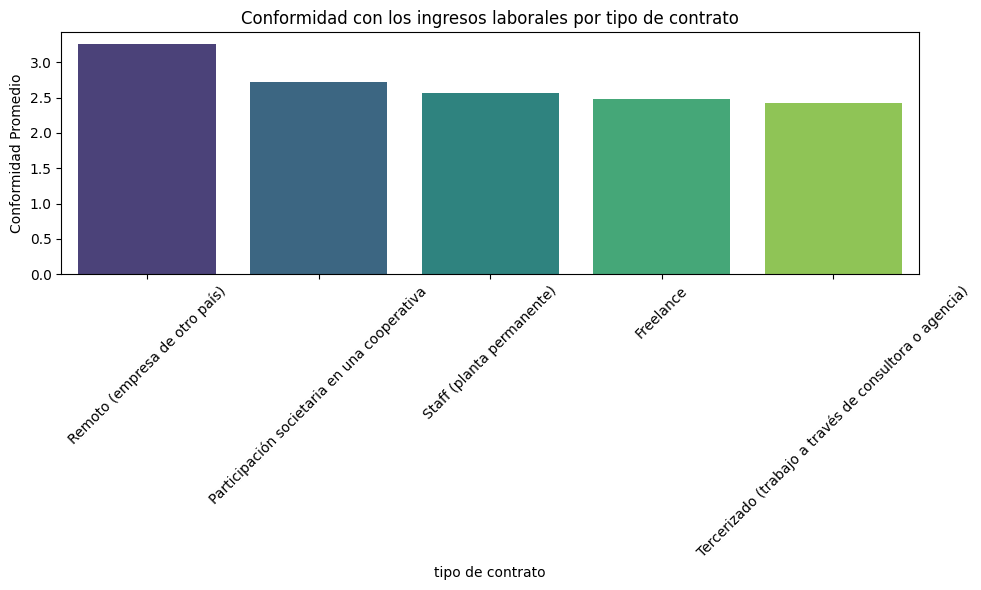

In [ ]:
# Agrupamos los tipos de contrato y calculamos la conformidad promedio

Conformidad_promedio = df.groupby('tipo de contrato')['que tan conforme estas con tus ingresos laborales'].mean().sort_values(ascending=False)

# Creamos un gráfico de barras para visualizar la satisfacción promedio por tipo de contrato

plt.figure(figsize=(10, 6))
sns.barplot(x=Conformidad_promedio.index, y=Conformidad_promedio.values, palette='viridis')
plt.title('Conformidad con los ingresos laborales por tipo de contrato')
plt.ylabel('Conformidad Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretacion:** Podemos ver a traves del grafico, que el mayor promedio de conformidad se encuentra en el grupo de empleados Remotos con un promedio de conformidad de 3.26 y un total de 521 personas.



In [ ]:
Conformidad_promedio

tipo de contrato
Remoto (empresa de otro país)                             3.262956
Participación societaria en una cooperativa               2.725000
Staff (planta permanente)                                 2.567970
Freelance                                                 2.477387
Tercerizado (trabajo a través de consultora o agencia)    2.417822
Name: que tan conforme estas con tus ingresos laborales, dtype: float64

In [ ]:
conteo_personas_por_contrato = df['tipo de contrato'].value_counts()

conteo_personas_por_contrato

tipo de contrato
Staff (planta permanente)                                 4502
Remoto (empresa de otro país)                              521
Tercerizado (trabajo a través de consultora o agencia)     505
Freelance                                                  199
Participación societaria en una cooperativa                 40
Name: count, dtype: int64

2- Que diferencia hay en los ingresos laborales entre empleados con diferentes niveles de experiencia?

In [ ]:
# Convertir la columna de ingresos a numérica

df['ultimo salario mensual o retiro neto en tu moneda local'] = pd.to_numeric(df['ultimo salario mensual o retiro neto en tu moneda local'], errors='coerce')

# Limpiar los datos de seniority

df['seniority'] = df['seniority'].astype('category')

# Eliminar filas con datos faltantes

df.dropna(subset=['ultimo salario mensual o retiro neto en tu moneda local', 'seniority'], inplace=True)

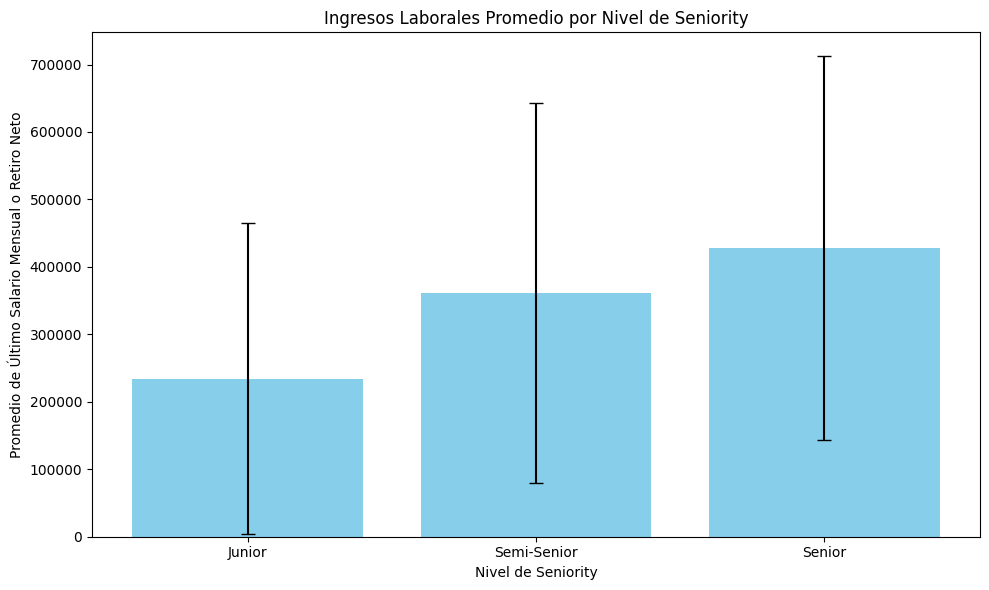

In [ ]:
# Calcular estadísticas resumidas por seniority y creamos el grafico

stats = df.groupby('seniority')['ultimo salario mensual o retiro neto en tu moneda local'].agg(['mean', 'std'])
plt.figure(figsize=(10, 6))
plt.bar(stats.index, stats['mean'], yerr=stats['std'], capsize=5, color='skyblue')
plt.title('Ingresos Laborales Promedio por Nivel de Seniority')
plt.xlabel('Nivel de Seniority')
plt.ylabel('Promedio de Último Salario Mensual o Retiro Neto')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Interpretacion: Podemos ver que el nivel Junior tiene un ingreso promedio de aproximadamente de 232782 pesos, mientras que los empleados Semi-Senior tienen un promedio de 383230 pesos y los empleados Senior tienen el ingreso promedio más alto, alrededor de 425460 pesos.

Las barras de error son más largas para el nivel Semi-Senior, indicando una mayor variabilidad en los ingresos dentro de este grupo en comparación con los otros niveles.

3-Cómo afecta la modalidad de trabajo (presencial, remoto, híbrido) al nivel de conformidad con los ingresos laborales?

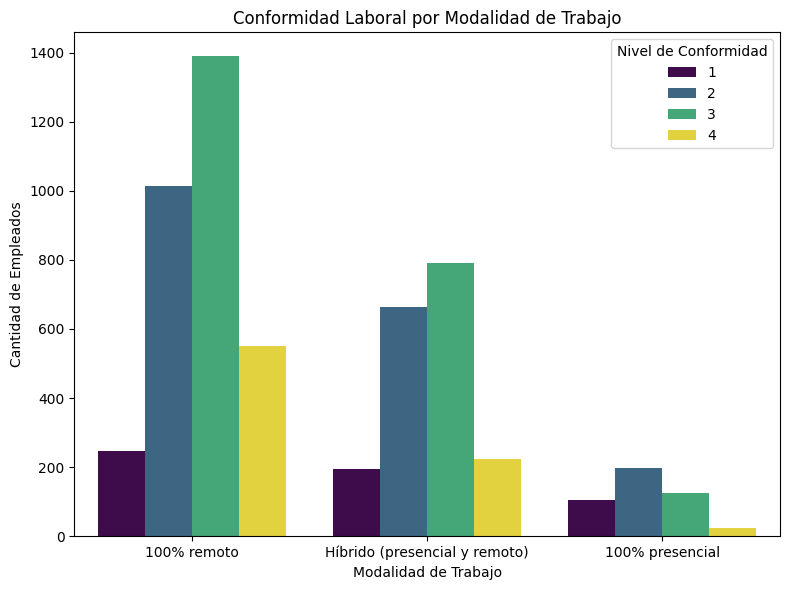

In [ ]:
#Creamos el grafico

plt.figure(figsize=(8, 6))
sns.countplot(x='modalidad de trabajo', hue='que tan conforme estas con tus ingresos laborales', data=df, palette='viridis')
plt.title('Conformidad Laboral por Modalidad de Trabajo')
plt.xlabel('Modalidad de Trabajo')
plt.ylabel('Cantidad de Empleados')
plt.legend(title='Nivel de Conformidad', loc='upper right')
plt.tight_layout()
plt.show()

**Interpretacion:** El gráfico revela que los empleados que trabajan en modalidades remotas o híbridas tienden a reportar mayores niveles de satisfacción con sus ingresos laborales en comparación con aquellos en modalidades presenciales. Esto podría atribuirse a la flexibilidad y autonomía que ofrecen estas modalidades, lo cual impacta positivamente en la percepción de los empleados sobre sus ingresos.

**Objetivo de estudio**: Determinar los factores que influyen en la conformidad con los ingresos laborales de los profesionales en el sector de informática.

**Variable a predecir**: "Qué tan conforme estás con tus ingresos laborales", una variable de clasificación multiclase con cinco niveles (Muy Insatisfecho, Insatisfecho, Neutro, Satisfecho, Muy Satisfecho).

In [ ]:

data = pd.read_csv('https://drive.google.com/uc?id=' + url.split('/')[-2])

# Seleccionamos las columnas relevantes
relevant_columns = [
    'estoy_trabajando_en', 'dedicacion', 'tipo_de_contrato',
    'ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local',
    'pagos_en_dolares', 'recibis_algun_tipo_de_bono',
    'tuviste_actualizaciones_de_tus_ingresos_laborales_durante_2022',
    'como_consideras_que_estan_tus_ingresos_laborales_comparados_con_el_semestre_anterior',
    'con_que_beneficios_contas', 'trabajo_de', 'anos_de_experiencia',
    'antigüedad_en_la_empresa_actual', 'tiempo_en_el_puesto_actual',
    'cuantas_personas_a_cargo_tenes', 'plataformas_que_utilizas_en_tu_puesto_actual',
    'lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual',
    'modalidad_de_trabajo', 'maximo_nivel_de_estudios',
    'tengo_edad', 'me_identifico_genero', 'seniority'
]

# Variable objetivo
target_column = 'que_tan_conforme_estas_con_tus_ingresos_laborales'

# Filtrar el dataset
data_filtered = data[relevant_columns + [target_column]]

# Manejo de valores faltantes
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = imputer.fit_transform(data_filtered)

# Codificación de variables categóricas
label_encoders = {}
data_encoded = pd.DataFrame(data_imputed, columns=data_filtered.columns)

for column in data_encoded.columns:
    if data_encoded[column].dtype == 'object':
        le = LabelEncoder()
        data_encoded[column] = le.fit_transform(data_encoded[column])
        label_encoders[column] = le

# Dividir el dataset en conjuntos de entrenamiento y prueba
X = data_encoded[relevant_columns]
y = data_encoded[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Usar RandomForestClassifier para selección de características
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

# Obtener las importancias de las características
importances = forest.feature_importances_
feature_importances = pd.DataFrame(importances, index=relevant_columns, columns=['importance']).sort_values(by='importance', ascending=False)

# Seleccionar las características más importantes
top_features = feature_importances.head(10).index.tolist()
print(top_features)


['como_consideras_que_estan_tus_ingresos_laborales_comparados_con_el_semestre_anterior', 'ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local', 'con_que_beneficios_contas', 'lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual', 'plataformas_que_utilizas_en_tu_puesto_actual', 'tengo_edad', 'anos_de_experiencia', 'trabajo_de', 'antigüedad_en_la_empresa_actual', 'tiempo_en_el_puesto_actual']


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Seleccionar las principales características para el entrenamiento
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Entrenar el RandomForestClassifier con las características seleccionadas
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_top, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_top)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Classification Report:\n{report}")


Accuracy: 0.6377816291161178
Precision: 0.6373544805659073
Recall: 0.6377816291161178
F1 Score: 0.6366527575582202
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.55      0.60       112
           1       0.62      0.61      0.62       390
           2       0.65      0.70      0.67       498
           3       0.61      0.57      0.59       154

    accuracy                           0.64      1154
   macro avg       0.64      0.61      0.62      1154
weighted avg       0.64      0.64      0.64      1154



**Conclusiones**

**Desempeño General del Modelo:**

El modelo de RandomForestClassifier alcanzó una precisión general de aproximadamente 63.8%. La precisión, recall y F1-score también son similares, con un valor de alrededor de 63.7%. Estos valores sugieren que el modelo tiene un desempeño razonablemente equilibrado en cuanto a la clasificación de las diferentes categorías de conformidad con los ingresos laborales.

**Análisis de la Matriz de Confusión:**

La matriz de confusión revela que el modelo tiene un desempeño variable entre las diferentes clases:

La clase Neutro (nivel 2) tiene el mejor desempeño con un F1-score de 0.67, lo que indica que el modelo es bastante preciso al clasificar esta categoría.

La clase Muy Insatisfecho (nivel 0) y la clase Muy Satisfecho (nivel 3) tienen los valores más bajos en precisión y recall, sugiriendo que el modelo tiene más dificultades para distinguir estas categorías.

**Importancia de las Características:**

Las características más importantes para el modelo, como el nivel de conformidad con los ingresos laborales comparado con el semestre anterior y el último salario mensual bruto, indican que las percepciones de los ingresos actuales en relación con el pasado y el nivel de salario son factores clave en la determinación de la conformidad con los ingresos. Esto es consistente con la intuición de que los ingresos actuales y su comparación con el pasado son fundamentales para la satisfacción laboral.